# **Problem Statement**

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. 


To solve this problem ABC pharma company approached an analytics company to automate this process of identification


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew 
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



# Read Dataset

In [2]:
data_H= pd.read_csv('E:/solo projects/Data_Glacier_virtual_internship/Data_Glacier_virtual_internship/Week08/Healthcare_dataset.csv')
data_H.head() 

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


#  **Data Understanding**
(Preprocessing)

In [3]:
print(f'Number of Observations: {data_H.shape[0]}')
print(f'Number of Features: {data_H.shape[1]}')

Number of Observations: 3424
Number of Features: 69


**Data Info**

In [4]:
data_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

**Features**

In [5]:
data_H.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com


**Data types**

In [6]:
data_H.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [7]:
print("Object Columns: ", data_H.select_dtypes(include = ["object"]).columns)


Object Columns:  Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Pe

In [8]:
print("Numerical Columns: ", data_H.select_dtypes(include = ["int64"]).columns)

Numerical Columns:  Index(['Dexa_Freq_During_Rx', 'Count_Of_Risks'], dtype='object')


In [9]:
obj_col = list(data_H.select_dtypes(['object']).columns)
print(len(obj_col))
obj_col

67


['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_S

**Size of the data**

In [10]:
data_H.size

236256

**Check Missing values**

In [11]:
missing_values = data_H.isna().sum()/len(data_H)*1004
missing_values

Ptid                              0.0
Persistency_Flag                  0.0
Gender                            0.0
Race                              0.0
Ethnicity                         0.0
                                 ... 
Risk_Hysterectomy_Oophorectomy    0.0
Risk_Estrogen_Deficiency          0.0
Risk_Immobilization               0.0
Risk_Recurring_Falls              0.0
Count_Of_Risks                    0.0
Length: 69, dtype: float64

**Unique values**

In [12]:
data_H.nunique()

Ptid                              3424
Persistency_Flag                     2
Gender                               2
Race                                 4
Ethnicity                            3
                                  ... 
Risk_Hysterectomy_Oophorectomy       2
Risk_Estrogen_Deficiency             2
Risk_Immobilization                  2
Risk_Recurring_Falls                 2
Count_Of_Risks                       8
Length: 69, dtype: int64

In [13]:
data_H.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [14]:
data_H.value_counts('Persistency_Flag')


Persistency_Flag
Non-Persistent    2135
Persistent        1289
dtype: int64

**Check duplicates**

In [15]:
data_H=data_H.drop_duplicates()
data_H


,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


# No duplicate found

**Drop id column**

In [16]:
# data_H.drop (['Ptid'], axis=1 , inplace=True)
# data_H.head()

**Outliers for numerical columns**

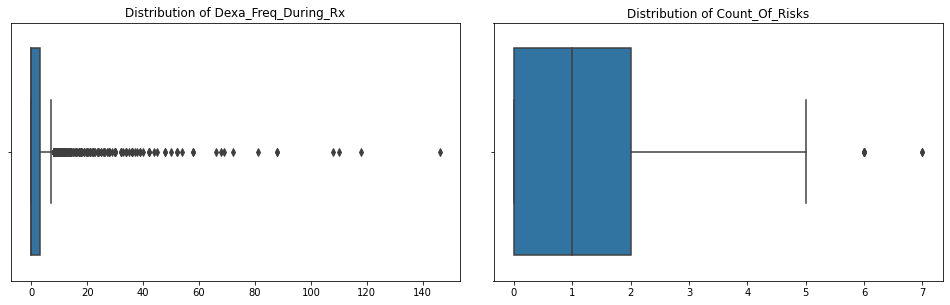

In [17]:
df = data_H.select_dtypes([int, float])

fig=plt.figure(figsize=(20,20))
for i ,columns in enumerate (df,1):
    ax= plt.subplot(5,3,i)
    sns.boxplot(data= df , x=df[columns])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)
plt.show()

**Check for Skewness**

In [18]:
skew_D = df.skew().sort_values(ascending=False)
skewness = pd.DataFrame({'skew':skew_D})
skewness

,skew
Dexa_Freq_During_Rx,6.808730
Count_Of_Risks,0.879791


skew was greater than zero so the more weight in the left tail of the distribution

**Histograms for numeric values**

array([[<AxesSubplot:title={'center':'Dexa_Freq_During_Rx'}>]],
      dtype=object)

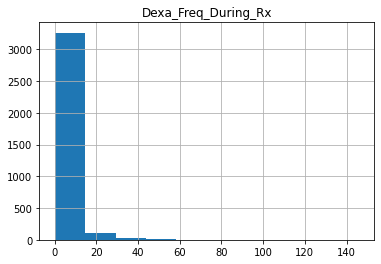

In [19]:
data_H.hist(column='Dexa_Freq_During_Rx')

array([[<AxesSubplot:title={'center':'Count_Of_Risks'}>]], dtype=object)

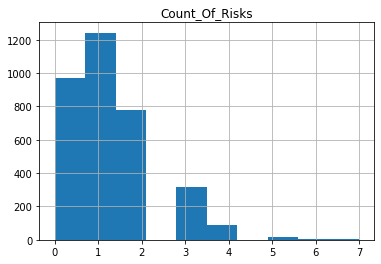

In [20]:
data_H.hist(column='Count_Of_Risks')

# Data Cleaning and Feature Engineering 

**Remove outliers by IQR**

In [21]:
data = data_H
data


,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


**Count_Of_Risks**

In [22]:
maxval = data["Count_Of_Risks"].max()
print(maxval)

minval = data["Count_Of_Risks"].min()
print(minval)

# Removing Outliers from Count_Of_Risks using IQR
Q1 = data["Count_Of_Risks"].quantile(0.25)
Q3 = data["Count_Of_Risks"].quantile(0.75)
IQR = Q3-Q1
lowqe_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lowqe_bound, upper_bound)


data = data[~(
    (data["Count_Of_Risks"] < lowqe_bound) | (data["Count_Of_Risks"] > upper_bound))]
data.shape

7
0
-3.0 5.0


(3416, 69)

**Dexa_Freq_During_Rx**

In [23]:
maxval = data["Dexa_Freq_During_Rx"].max()
print(maxval)

minval = data["Dexa_Freq_During_Rx"].min()
print(minval)

# Removing Outliers from Dexa_Freq_During_Rx using IQR
Q1 = data["Dexa_Freq_During_Rx"].quantile(0.25)
Q3 = data["Dexa_Freq_During_Rx"].quantile(0.75)
IQR = Q3-Q1
lowqe_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lowqe_bound, upper_bound)


data = data[~(
    (data["Dexa_Freq_During_Rx"] < lowqe_bound) | (data["Dexa_Freq_During_Rx"] > upper_bound))]
data.shape

146
0
-4.5 7.5


(2956, 69)

plot after remove outliers

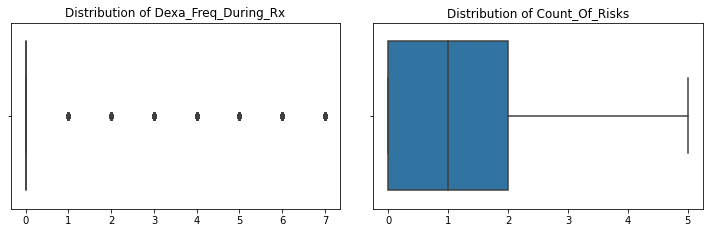

In [24]:
df = data.select_dtypes([int, float])

fig=plt.figure(figsize=(15,15))
for i ,columns in enumerate (df,1):
    ax= plt.subplot(5,3,i)
    sns.boxplot(data= df , x=df[columns])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)
plt.show()

**Remove outliers by Z-Score**

In [25]:
data_outliers = data_H.select_dtypes([int, float])

In [26]:
from scipy import stats
df2 = data_outliers[(np.abs(stats.zscore(data_outliers)) < 2).all(axis=1)]

In [27]:
df2

,Dexa_Freq_During_Rx,Count_Of_Risks
0,0,0
1,0,0
2,0,2
3,0,1
4,0,1
...,...,...
3419,0,1
3420,0,0
3421,7,1
3422,0,0


In [28]:
df2.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3196.000000,3196.000000
mean,1.875782,1.129850
std,3.834596,0.946638
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,19.000000,3.000000


Will use the data that done by IQR to continue the next steps

Fix Skewness

In [29]:
skew_D = data.select_dtypes([int, float]).skew().sort_values(ascending=False)
skewness = pd.DataFrame({'skew':skew_D})
skewness

,skew
Dexa_Freq_During_Rx,2.236228
Count_Of_Risks,0.756546


In [30]:
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(data.select_dtypes([int, float]))
df=pd.DataFrame(X_power,columns=data.select_dtypes([int, float]).columns)

array([[<AxesSubplot:title={'center':'Count_Of_Risks'}>]], dtype=object)

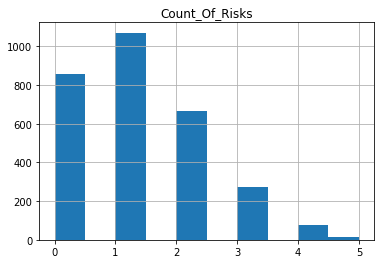

In [31]:
data.hist(column='Count_Of_Risks')

array([[<AxesSubplot:title={'center':'Dexa_Freq_During_Rx'}>]],
      dtype=object)

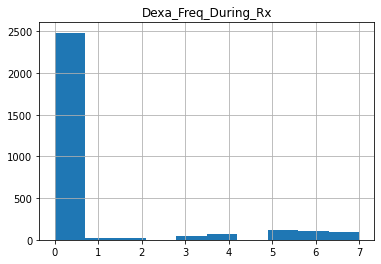

In [32]:
data.hist(column='Dexa_Freq_During_Rx')

# EDA

Analysis 

**Non-Persistent have higher records in dataset**

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

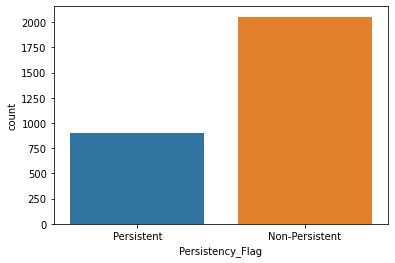

In [33]:
sns.countplot(x="Persistency_Flag",data=data, dodge=True)

**The age_Bucker >75 in Persistent and non-Persistent have higher values**

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

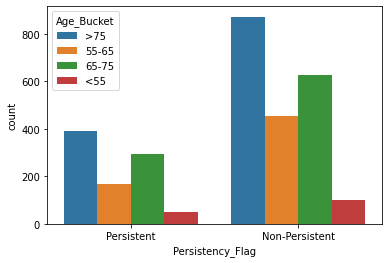

In [34]:
sns.countplot(x="Persistency_Flag", hue='Age_Bucket', data=data)


<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

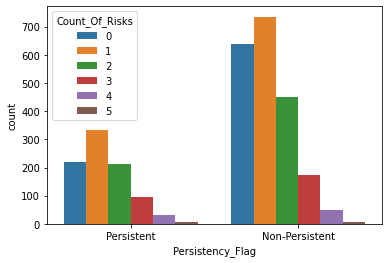

In [35]:
sns.countplot(x="Persistency_Flag", hue='Count_Of_Risks', data=data)


**The Caucasian Race in both persistent and non-Persistent have highest count**

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

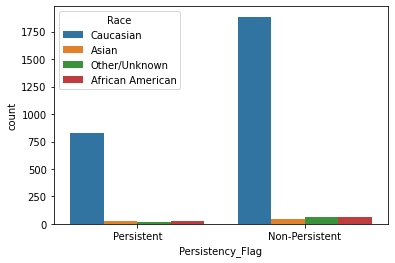

In [36]:
sns.countplot( x='Persistency_Flag', hue='Race',data=data)

**Not Hispanic is dominant in Persistency_Flag**

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

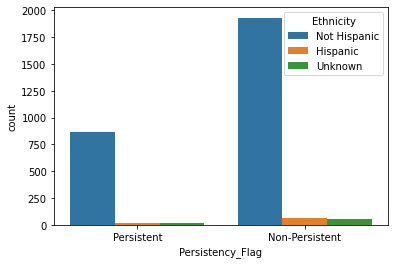

In [37]:
sns.countplot( x='Persistency_Flag', hue='Ethnicity', data=data)

**In all the regions the dominant was Not-Persistent**

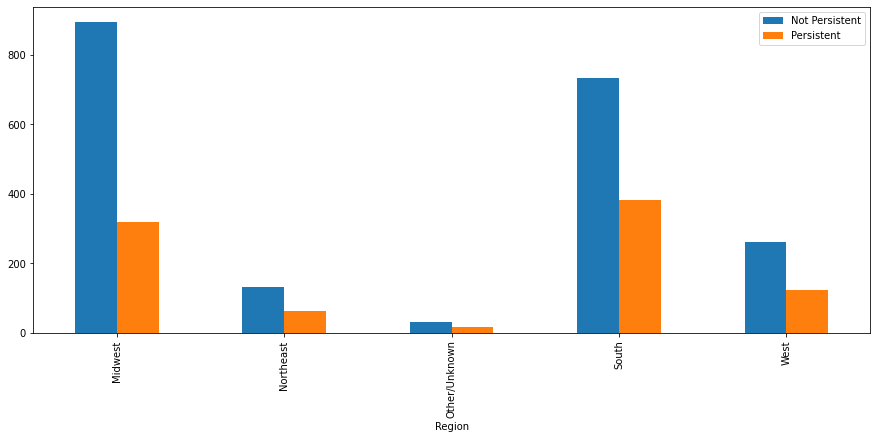

In [38]:
pd.crosstab(data['Region'], data['Persistency_Flag']).plot(kind='bar', figsize=(15, 6))
plt.legend(['Not Persistent', 'Persistent'])
plt.show()

**Female patients are more persistent of a drug than male**

<AxesSubplot:xlabel='Persistency_Flag', ylabel='Count'>

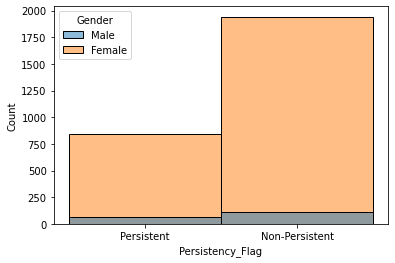

In [39]:
sns.histplot(x='Persistency_Flag', hue='Gender', data=data)

**The number of patients without having Dexa scan is higher**

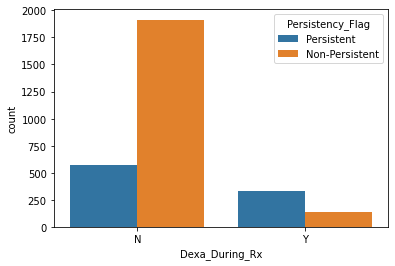

In [40]:
subplt1 = sns.countplot(x='Dexa_During_Rx', hue='Persistency_Flag', data=data)

**The ratio of the patients which are stable is much more higher than of the ratio of the improved patients**

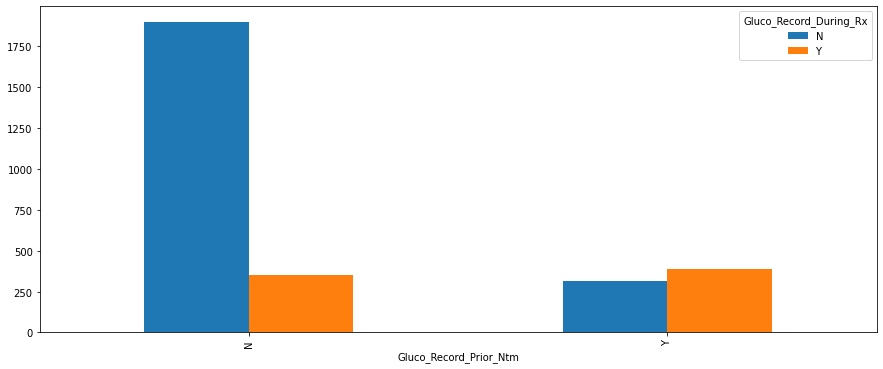

In [41]:
pd.crosstab(data["Gluco_Record_Prior_Ntm"], data["Gluco_Record_During_Rx"]).plot(kind='bar', figsize=(15, 6))
plt.show()

# Encoding

get all categorical columns


convert all categorical columns to numeric

In [42]:
cat_columns = data.select_dtypes(['object']).columns

data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x)[0])


data

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,2,1,1,2,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,3,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,2951,0,1,0,0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3420,2952,0,1,0,0,2,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,2953,0,1,0,0,2,0,1,1,1,...,0,0,1,0,0,0,0,0,0,1
3422,2954,1,1,0,0,2,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0


Check null values again

In [43]:
data.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In my opnion, we need to reduce some of features so these feature will be dropped and hence will have 50 column 

The columns Risk_Type_1_Insulin_Dependent_Diabetes, Risk_Osteogenesis_Imperfecta, Risk_Rheumatoid_Arthritis, Risk_Untreated_Chronic_Hyperthyroidism, Risk_Untreated_Chronic_Hypogonadism, Risk_Untreated_Early_Menopause, Risk_Patient_Parent_Fractured_Their_Hip ,Risk_Smoking_Tobacco, Risk_Chronic_Malnutrition_Or_Malabsorption, Risk_Chronic_Liver_Disease, Risk_Family_History_Of_Osteoporosis ,Risk_Low_Calcium_Intake, Risk_Vitamin_D_Insufficiency, Risk_Poor_Health_Frailty, Risk_Excessive_Thinness, Risk_Hysterectomy_Oophorectomy, Risk_Estrogen_Deficiency, Risk_Immobilization Risk_Recurring_Falls


In [44]:
data = data.drop(['Risk_Type_1_Insulin_Dependent_Diabetes','Risk_Osteogenesis_Imperfecta','Risk_Rheumatoid_Arthritis',
'Risk_Untreated_Chronic_Hyperthyroidism','Risk_Untreated_Chronic_Hypogonadism','Risk_Untreated_Early_Menopause',
'Risk_Patient_Parent_Fractured_Their_Hip','Risk_Smoking_Tobacco','Risk_Chronic_Malnutrition_Or_Malabsorption',
'Risk_Chronic_Liver_Disease','Risk_Family_History_Of_Osteoporosis','Risk_Low_Calcium_Intake','Risk_Vitamin_D_Insufficiency',
'Risk_Poor_Health_Frailty','Risk_Excessive_Thinness','Risk_Hysterectomy_Oophorectomy','Risk_Estrogen_Deficiency'
,'Risk_Immobilization','Risk_Recurring_Falls'], axis = 1)



In [45]:
data.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

The Columns:
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,Comorb_Encntr_For_General_Exam_W_O_Complaint,
_Susp_Or_Reprtd_Dx,Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy, Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,
Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,
Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics, Concom_Systemic_Corticosteroids_Plain,
Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones, Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins, Concom_Anaesthetics_General,Concom_Viral_Vaccines

Will be two columns have count of them one for columns that start with comorb and one for concom

In [46]:
# Count_Of_Concomitancy
data['Count_Of_Concomitancy'] = data.iloc[:, 37:48].dot(np.ones(data.iloc[:, 37:48].shape[1]))

# Count_Of_Comorbidity
data['Count_Of_Comorbidity'] = data.iloc[:, 24:36].dot(np.ones(data.iloc[:, 24:36].shape[1]))




In [47]:

data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Count_Of_Risks,Count_Of_Concomitancy,Count_Of_Comorbidity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,4.0
2,2,1,1,2,1,1,2,0,0,0,...,0,0,0,0,0,0,0,2,1.0,5.0
3,3,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,3.0,4.0
4,4,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,3.0,2.0


In [48]:
data=data.drop(['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms','Comorb_Encounter_For_Immunization',
'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
'Comorb_Vitamin_D_Deficiency','Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx','Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
'Comorb_Personal_History_Of_Other_Diseases_And_Conditions','Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias','Comorb_Osteoporosis_without_current_pathological_fracture',
'Comorb_Personal_history_of_malignant_neoplasm','Comorb_Gastro_esophageal_reflux_disease','Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain','Concom_Anti_Depressants_And_Mood_Stabilisers',
'Concom_Fluoroquinolones', 'Concom_Cephalosporins','Concom_Macrolides_And_Similar_Types',
'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General','Concom_Viral_Vaccines'], axis = 1)



In [49]:
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Count_Of_Risks,Count_Of_Concomitancy,Count_Of_Comorbidity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,1,1,0,1,0,0,1,0,0,0,...,1,1,1,0,0,0,0,0,0.0,4.0
2,2,1,1,2,1,1,2,0,0,0,...,2,0,0,1,0,0,0,2,1.0,5.0
3,3,1,1,0,0,1,0,0,0,0,...,2,0,0,1,0,0,0,1,3.0,4.0
4,4,1,1,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,1,3.0,2.0


# **Models**
**Model Selection**

In [50]:
y = data['Persistency_Flag']
y

0       0
1       1
2       1
3       1
4       1
       ..
3419    0
3420    0
3421    0
3422    1
3423    1
Name: Persistency_Flag, Length: 2956, dtype: int64

In [51]:
x = data.drop(['Persistency_Flag'],axis = 1)
x

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Count_Of_Risks,Count_Of_Concomitancy,Count_Of_Comorbidity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,1,0,1,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0.0,4.0
2,2,1,2,1,1,2,0,0,0,0,...,2,0,0,1,0,0,0,2,1.0,5.0
3,3,1,0,0,1,0,0,0,0,0,...,2,0,0,1,0,0,0,1,3.0,4.0
4,4,1,0,0,1,0,0,0,0,1,...,1,1,1,0,0,0,0,1,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,2951,1,0,0,2,0,0,0,0,0,...,1,1,1,0,0,1,0,1,6.0,7.0
3420,2952,1,0,0,2,0,5,0,0,0,...,1,1,1,0,1,1,0,0,2.0,5.0
3421,2953,1,0,0,2,0,1,1,1,0,...,2,0,0,2,0,1,0,1,3.0,9.0
3422,2954,1,0,0,2,1,5,0,0,0,...,1,1,1,0,0,1,0,0,2.0,7.0


In [52]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


# Logistic Regression

In [53]:


lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)


In [54]:

accuracy_score(y_test, y_pred_lgr)*100

78.04054054054053

In [55]:

print(classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.76      0.43      0.55       183
           1       0.79      0.94      0.86       409

    accuracy                           0.78       592
   macro avg       0.77      0.68      0.70       592
weighted avg       0.78      0.78      0.76       592



# Decision Tree

In [56]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

69.42567567567568

In [57]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.51      0.54      0.52       183
           1       0.79      0.77      0.78       409

    accuracy                           0.69       592
   macro avg       0.65      0.65      0.65       592
weighted avg       0.70      0.69      0.70       592



# Support Vector Machine

In [58]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100

69.08783783783784

In [59]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       183
           1       0.69      1.00      0.82       409

    accuracy                           0.69       592
   macro avg       0.35      0.50      0.41       592
weighted avg       0.48      0.69      0.56       592



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

# Gradient Boosting Model

In [60]:
gbm=GradientBoostingClassifier()
gbm_model=gbm.fit(x_train, y_train)
y_pred_gbm=gbm_model.predict(x_test)
accuracy_score(y_test, y_pred_gbm)*100


79.05405405405406

In [61]:
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.79      0.44      0.56       183
           1       0.79      0.95      0.86       409

    accuracy                           0.79       592
   macro avg       0.79      0.69      0.71       592
weighted avg       0.79      0.79      0.77       592



# Random Forest Classifier

In [62]:

regressor =RandomForestClassifier()

#fit the model
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
accuracy_score(y_test, y_pred_rf)*100

78.04054054054053

In [63]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.43      0.55       183
           1       0.79      0.94      0.86       409

    accuracy                           0.78       592
   macro avg       0.77      0.68      0.70       592
weighted avg       0.78      0.78      0.76       592



# KNN 

In [64]:
knn=KNeighborsClassifier()
knn_model=knn.fit(x_train, y_train)
y_pred= knn_model.predict(x_test)
accuracy_score(y_test, y_pred)*100


73.1418918918919

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.27      0.38       183
           1       0.74      0.94      0.83       409

    accuracy                           0.73       592
   macro avg       0.70      0.60      0.60       592
weighted avg       0.72      0.73      0.69       592



# Neural Network

In [66]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


75.50675675675676

In [67]:
print(classification_report(y_test, y_pred_networks))

              precision    recall  f1-score   support

           0       0.64      0.48      0.55       183
           1       0.79      0.88      0.83       409

    accuracy                           0.76       592
   macro avg       0.71      0.68      0.69       592
weighted avg       0.74      0.76      0.74       592



# ROC-AUC

In [68]:
y_score1 = model.predict(x_test)
y_score2 = model_rf.predict(x_test)
y_score3 = tree_model.predict(x_test)
y_score4 = model_svc.predict(x_test)
y_score5 = knn_model.predict(x_test)
y_score6 = gbm_model.predict(x_test)
y_score7 = mlpc.predict(test_scaled)


In [69]:



fpr_lr, tpr_lr, threshold1 = roc_curve(y_test,  y_score1)
fpr_rfc, tpr_rfc, threshold1 =roc_curve(y_test,  y_score2)
fpr_dtc, tpr_dtc, threshold1 =roc_curve(y_test,  y_score3)
fpr_svc, tpr_svc, threshold1 = roc_curve(y_test,  y_score4)
fpr_knn, tpr_knn, threshold1 =roc_curve(y_test,  y_score5)
fpr_gbm, tpr_gbm, threshold1 =roc_curve(y_test,  y_score6)
fpr_mlpc, tpr_mlpc, threshold1 =roc_curve(y_test,  y_score7)



In [70]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

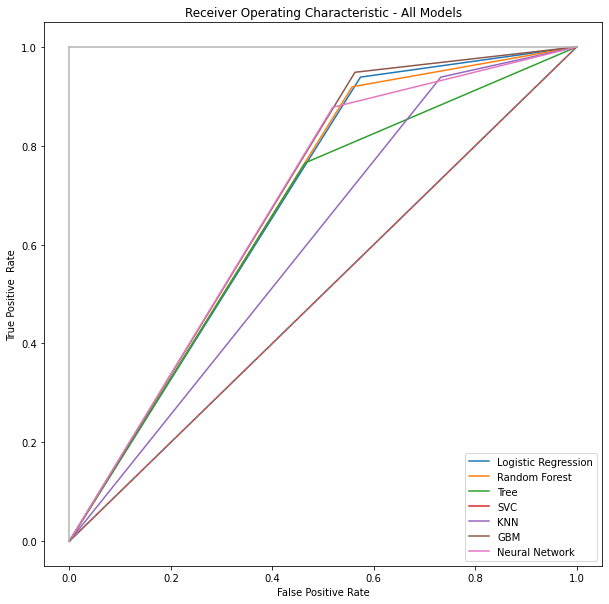

In [71]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - All Models')
plt.plot(fpr_lr, tpr_lr, label = "Logistic Regression")
plt.plot(fpr_rfc, tpr_rfc, label = "Random Forest")
plt.plot(fpr_dtc, tpr_dtc, label = "Tree")
plt.plot(fpr_svc, tpr_svc,  label = "SVC")
plt.plot(fpr_knn, tpr_knn, label = "KNN")
plt.plot(fpr_gbm, tpr_gbm, label = "GBM")
plt.plot(fpr_mlpc, tpr_mlpc, label = "Neural Network")



plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive  Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

We split the dataset as train set and test set.

We have applied Logistic Regression, KNN, Random Forest Model, Decision Tree, Support Vector Machines, Gradient Boosting Model, and Neural Network Models.

we have calculated their accuracy scores and we obtained the following:

Gradient Boosting Model is the best fit model to our dataset with accuracy score 79.05.

We can apply Logistic Regression and Random Forest since their accuracy score 78

# **Model Selection**
**Gradient Boosting Model** 

save dataset after cleaning to new csv file to start building model

In [72]:
data.to_csv("Healthcare_cleaned_dataset.csv")
data_cleaned = pd.read_csv("Healthcare_cleaned_dataset.csv")
data_cleaned 


,Unnamed: 0,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,...,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Count_Of_Risks,Count_Of_Concomitancy,Count_Of_Comorbidity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,1,1,1,0,1,0,0,1,0,0,...,1,1,1,0,0,0,0,0,0.0,4.0
2,2,2,1,1,2,1,1,2,0,0,...,2,0,0,1,0,0,0,2,1.0,5.0
3,3,3,1,1,0,0,1,0,0,0,...,2,0,0,1,0,0,0,1,3.0,4.0
4,4,4,1,1,0,0,1,0,0,0,...,1,1,1,0,0,0,0,1,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,3419,2951,0,1,0,0,2,0,0,0,...,1,1,1,0,0,1,0,1,6.0,7.0
2952,3420,2952,0,1,0,0,2,0,5,0,...,1,1,1,0,1,1,0,0,2.0,5.0
2953,3421,2953,0,1,0,0,2,0,1,1,...,2,0,0,2,0,1,0,1,3.0,9.0
2954,3422,2954,1,1,0,0,2,1,5,0,...,1,1,1,0,0,1,0,0,2.0,7.0


In [73]:
data_cleaned.columns

Index(['Unnamed: 0', 'Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity',
       'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Count_Of_Risks', 'Count_Of_Concomitancy', 'Count_Of_Comorbidity'],
      dtype='object')

In [74]:
data_cleaned= data_cleaned.drop(['Unnamed: 0'], axis=1)
data_cleaned

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Count_Of_Risks,Count_Of_Concomitancy,Count_Of_Comorbidity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,1,1,0,1,0,0,1,0,0,0,...,1,1,1,0,0,0,0,0,0.0,4.0
2,2,1,1,2,1,1,2,0,0,0,...,2,0,0,1,0,0,0,2,1.0,5.0
3,3,1,1,0,0,1,0,0,0,0,...,2,0,0,1,0,0,0,1,3.0,4.0
4,4,1,1,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,1,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2951,0,1,0,0,2,0,0,0,0,...,1,1,1,0,0,1,0,1,6.0,7.0
2952,2952,0,1,0,0,2,0,5,0,0,...,1,1,1,0,1,1,0,0,2.0,5.0
2953,2953,0,1,0,0,2,0,1,1,1,...,2,0,0,2,0,1,0,1,3.0,9.0
2954,2954,1,1,0,0,2,1,5,0,0,...,1,1,1,0,0,1,0,0,2.0,7.0


In [75]:
y = data_cleaned['Persistency_Flag']
y

x = data_cleaned.drop(['Persistency_Flag'],axis = 1)
x

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Count_Of_Risks,Count_Of_Concomitancy,Count_Of_Comorbidity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,1,0,1,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0.0,4.0
2,2,1,2,1,1,2,0,0,0,0,...,2,0,0,1,0,0,0,2,1.0,5.0
3,3,1,0,0,1,0,0,0,0,0,...,2,0,0,1,0,0,0,1,3.0,4.0
4,4,1,0,0,1,0,0,0,0,1,...,1,1,1,0,0,0,0,1,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2951,1,0,0,2,0,0,0,0,0,...,1,1,1,0,0,1,0,1,6.0,7.0
2952,2952,1,0,0,2,0,5,0,0,0,...,1,1,1,0,1,1,0,0,2.0,5.0
2953,2953,1,0,0,2,0,1,1,1,0,...,2,0,0,2,0,1,0,1,3.0,9.0
2954,2954,1,0,0,2,1,5,0,0,0,...,1,1,1,0,0,1,0,0,2.0,7.0


In [76]:

Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [77]:
gbm=GradientBoostingClassifier()
gbm_select=gbm.fit(x_train, y_train)
y_predict_gbm=gbm_select.predict(x_test)
accuracy_score(y_test, y_predict_gbm)*100

79.05405405405406

# Flask Deployement 

**Make pickle file to the model**

In [81]:
import pickle
pickle.dump(gbm_select, open('Model/model_gbm.pkl', 'wb'))

**Loading model**

In [82]:

model = pickle.load(open('Model/model_gbm.pkl', 'rb'))

In [84]:
from unittest import result
from flask import Flask , request,render_template
import numpy as np
import pickle 


app=Flask(__name__)
model = pickle.load(open('Model/model_gbm.pkl','rb'))

@app.route('/')
def home():
    return render_template('index.html')


@app.route('/predict',methods=['POST'])
def predict():
    


    features = [float(x) for x in request.form.values()]
    final_features = [np.array(features)] 
    prediction = model.predict(final_features)
    
    return render_template('index.html', prediction_text='The Presistent_Flag is {}'.format(prediction))

if __name__ == '__main__':
    #  app.run(port =5000,debug=True, use_reloader=False)
    app.run(host='127.0.0.1', port =5000,debug=True, use_reloader=False)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
